In [1]:
import numpy as np
#import os

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from astropy.io import fits

from setup import *
from FullFrame import FullFrame

from scipy.interpolate import interp1d

##--------------------------------------------------------------------------##
##             NECESSARY USER INPUTS BELOW....                              ##
##--------------------------------------------------------------------------##

##################
###   WASP4b   ###
##################
obs_date='ut20150819'                           #observation date
obj_name='Wasp4'                                #object name   
midtime=['2015-08-19T07:43:00.00']                 #time of midtransit, WAsp-4b

path='/Volumes/ermay_ext/Magellan/'+obs_date+'/'
data_path=path+obj_name+'_Spec/'      #path to where your data is saved
flat_path=path+obj_name+'_Flats/'     #path to where your SLIT flats are saved
DARKS=path+obj_name+'_Darks/'     #path to where your darks are saved
FLATS=path+'Full_Flats/'             #path to where the full field flats are saved 
WAVE=path+obj_name+'_Arcs/'

#SAVEPATH='SaveData/'+obj_name+'/'
SAVEPATH=path+'SaveData_'+obj_name+'/'

wavelength_path=path+'WaveSolution/'



extray=400 #number of extra pixels to extract per side in y direction
extrax=80  #number on the side to find wavelength strip, only for nights with a single mask


binn=1    #binning
#### CHECK BINNING IN SETUP.PY ####
#### if 1x1 binning, xpixels,ypixels should be 2048,4096
#### if 2x2 binning, xpixels,ypixels should be 1024,2048
print xpixels/binn, ypixels/binn



from matplotlib.font_manager import FontProperties
font0=FontProperties()
font=font0.copy()
font.set_family('serif')

fontb=font.copy()
fontb.set_weight('bold')

import os

2048 4096


In [2]:
# HUitson 2017 --- W4

waves_dn_b=10.*np.array([440.2,450.7,460.2,469.1,487.0,496.0,504.9,515.2,524.8,534.8,564.8,574.8,585.3,594.9,612.8,621.7])
waves_up_b=10.*np.array([450.6,460.5,468.9,477.9,495.8,504.7,515.1,524.1,534.6,544.6,574.7,585.2,595.3,603.6,621.5,630.5])
rads_b=np.array([0.001,0.0005,-0.0001,0.0,0.0003,0.0002,0.0005,-0.0004,0.0001,0.0004,0.0012,0.0004,0.0009,0.0004,0.0005,0.0004])
rads_err_b=np.array([0.0008,0.0006,0.0008,0.0006,0.0011,0.0006,0.0005,0.0004,0.0008,0.0004,0.0006,0.0005,0.0004,0.0003,0.0004,0.0004])

waves_dn_r=10.*np.array([573.6,583.6,594.3,605.4,616.5,627.6,638.7,660.1,670.2,679.9,690.3,722.1,801.7,823.5,845.2,867.0,888.7,910.4])
waves_up_r=10.*np.array([583.2,593.3,605.1,616.1,627.2,638.3,648.7,669.5,679.5,689.9,700.3,746.4,824.9,846.6,868.4,890.1,911.9,934.6])
rads_r=np.array([0.0006,0.0013,0.0007,0.0005,0.0002,0.0003,0.0001,0.0003,0.0001,0.0003,0.0012,0.0001,0.0004,-0.0013,0.0002,-0.0005,0.0001,0.0007])
rads_err_r=np.array([0.0003,0.0004,0.0004,0.0003,0.0002,0.0002,0.0003,0.0004,0.0004,0.0004,0.0003,0.0012,0.0009,0.0012,0.0009,0.0006,0.0009,0.0006])

In [3]:
width=200

bin_counts=np.load(SAVEPATH+'Binned_Data_'+str(int(width))+'.npz')['bin_counts']  #[n_exp,numbins,n_obj]
ptn_err=np.sqrt(bin_counts)
ppm_tar=1./ptn_err[:,:,0]

ppm_tar_exp=np.nanmedian(ppm_tar,axis=0)

print ppm_tar_exp.shape
print ppm_tar_exp*10**6.



(18,)
[ 600.33758432  385.18341583  345.08271014  324.48003612  302.05851641
  290.85071917  284.4756149   279.26141471  278.07402898  277.57134483
  277.30279883  275.91873277  286.39543123  292.48757163  303.81464557
  319.25388483  348.16291888  341.66749254]


18


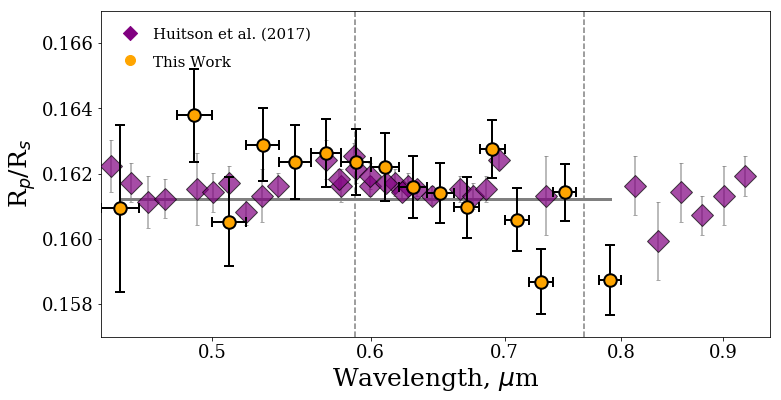

In [8]:
###WASP 4b
width=200
#em=10.

bin_counts=np.load(SAVEPATH+'Binned_Data_'+str(int(width))+'.npz')['bin_counts']  #[n_exp,numbins,n_obj]
ptn_err=np.sqrt(bin_counts)
ppm_tar=1./ptn_err[:,:,0]
ppm_tar_exp=np.nanmedian(ppm_tar,axis=0)

bin_counts_200=np.load(SAVEPATH+'Binned_Data_200.npz')['bin_counts']  #[n_exp,numbins,n_obj]
ptn_err_200=np.sqrt(bin_counts_200)
ppm_tar_200=1./ptn_err_200[:,:,0]
ppm_tar_exp_200=np.nanmedian(ppm_tar_200,axis=0)


bin_ctr_200=np.load(SAVEPATH+'LC_bins_br_200.npz')['bin_ctr']
rp_200=np.empty([len(bin_ctr_200)])
rp_e_200=np.empty([len(bin_ctr_200)])

bin_ctr=np.load(SAVEPATH+'LC_bins_br_'+str(int(width))+'.npz')['bin_ctr']
rp=np.empty([len(bin_ctr)])
rp_e=np.empty([len(bin_ctr)])

##################################################################################
norm=matplotlib.colors.Normalize(vmin=np.min(bin_ctr_200),vmax=np.max(bin_ctr_200))                                                                                                                 
colors=matplotlib.cm.Spectral_r
scal_m=matplotlib.cm.ScalarMappable(cmap=colors,norm=norm)
scal_m.set_array([])
##################################################################################

print len(bin_ctr)

b=0
for file in os.listdir(SAVEPATH+'Fits_'+str(int(width))+'/'):
    if file.endswith('.npz'):
        if b==len(bin_ctr):
            rbwhite=(np.load(SAVEPATH+'Fits_'+str(int(width))+'/'+file)['params'])[2]
        else:
            rp[b]=(np.load(SAVEPATH+'Fits_'+str(int(width))+'/'+file)['params'])[2]
            rp_e[b]=np.nanmedian((np.load(SAVEPATH+'Fits_'+str(int(width))+'/'+file)['paramserr'])[0,0])
#            rs_e[b]=np.abs(np.nanmedian(np.load(SAVEPATH+'Fits_'+str(int(width))+'/'+file)['residuals']))*10**-6
            b+=1
            
b=0
for file in os.listdir(SAVEPATH+'Fits_200/'):
    if file.endswith('.npz'):
        if b==len(bin_ctr_200):
            rbwhite_200=(np.load(SAVEPATH+'Fits_200/'+file)['params'])[2]
        else:
            rp_200[b]=(np.load(SAVEPATH+'Fits_200/'+file)['params'])[2]
            rp_e_200[b]=np.nanmedian((np.load(SAVEPATH+'Fits_200/'+file)['paramserr'])[0,0])
#            rs_e_200[b]=np.abs(np.nanmedian(np.load(SAVEPATH+'Fits_200/'+file)['residuals']))*10**-6
            b+=1
            
owave=np.logspace(4000,9000,1000)

wavelog=np.log(bin_ctr_200)
rays=np.polyfit(wavelog,rp_200,1)
ray=(np.poly1d(rays))(wavelog)

lins=np.polyfit(wavelog,rp_200,0)
lin=(np.poly1d(lins))(wavelog)



###########################
#sys.path.insert(0,SAVEPATH) 
#from SystemCons import *

alpha=-4.
kb=1.380658*10**-16   #boltzmann constant, erg/K
mh=1.6726*10**-24     #mass of hydrogen in g
muj=2.3                #mu of jupiter

# Rs is in cm

#-----W4, int=0.1735
Rs=6.4*10**10.
Tplan=1600.   #temperature of planet in K
gplan=1707.   # gravity in cm/s^2


slope=(alpha/Rs)*(kb*Tplan)/((muj*mh)*gplan)
raya=(np.poly1d([slope,0.1675]))(wavelog)
#########################

chi_rayfit=np.nansum((ray-rp_200)**2.)
chi_flat=np.nansum((lin-rp_200)**2.)
chi_act=np.nansum((raya-rp_200)**2.)

xerr1=np.abs(np.log(bin_ctr/(bin_ctr-width/2.)))
xerr2=np.abs(np.log(bin_ctr_200/(bin_ctr_200+100.)))
                
            
            
plt.figure(figsize=(12,6)) 
#plt.figure(figsize=(8,10.5)) #full page size
#plt.figure(figsize=(8,5.25)) #half page size

plt.plot(wavelog,lin,color='grey',linewidth=3.0,linestyle='-')
plt.plot(wavelog,raya,color='grey',linewidth=3.0,linestyle='--')

plt.plot(np.log(waves_dn_b+(waves_up_b-waves_dn_b)/2.),rads_b+lin[0],'D',markersize=15,markeredgecolor='black',markerfacecolor='purple',zorder=8,alpha=0.7)
plt.errorbar(np.log(waves_dn_b+(waves_up_b-waves_dn_b)/2.),rads_b+lin[0],yerr=rads_err_b,zerr=(waves_up_b-waves_dn_b),capsize=2,ecolor='grey',fmt='None',zorder=7,alpha=0.7)

plt.plot(np.log(waves_dn_r+(waves_up_r-waves_dn_r)/2.),rads_r+lin[0],'D',markersize=15,markeredgecolor='black',markerfacecolor='purple',zorder=8,alpha=0.7)
plt.errorbar(np.log(waves_dn_r+(waves_up_r-waves_dn_r)/2.),rads_r+lin[0],yerr=rads_err_r,zerr=(waves_up_r-waves_dn_r),capsize=2,ecolor='grey',fmt='None',zorder=7,alpha=0.7)

#for b in range(0,len(bin_ctr)):
#    if b==0 or b==1 or b==3 or b==5:
#        continue
#    plt.plot(np.log(bin_ctr[b]),rp[b],'.', markeredgewidth=0.5,markersize=18,markeredgecolor='black', markerfacecolor=scal_m.to_rgba(bin_ctr[b]),alpha=0.3,zorder=11)
#    #plt.errorbar(np.log(bin_ctr[b]),rp[b],yerr=ppm_tar_exp[b],xerr=xerr1[b],color='black',elinewidth=0.5,capsize=2.0,capthick=1.0,alpha=0.3,zorder=10)
#    plt.errorbar(np.log(bin_ctr[b]),rp[b],yerr=ppm_tar_exp[b]+rp_e[b]+rs_e[b],xerr=xerr1[b],color='black',elinewidth=0.5,capsize=2.0,capthick=1.0,alpha=0.3,zorder=10)

    #em*(rp_e_200[b]+rs_e_200[b]+dt_e_t_200[b])
for b in range(0,len(bin_ctr_200)):
    if b==1:
        continue
    #if b==0 or b==1 or b==2:# or b==3 or b==11 or b==17:
    #    continue
    plt.plot(np.log(bin_ctr_200[b]),rp_200[b],'.', markeredgewidth=2.0,markersize=25,markeredgecolor='black', markerfacecolor='orange',zorder=11)
    plt.errorbar(np.log(bin_ctr_200[b]),rp_200[b],yerr=rp_e_200[b],xerr=xerr2[b],color='black',elinewidth=2.0,capsize=5.0,capthick=2.0,zorder=10)
plt.axvline(x=np.log(5890),linestyle='--',color='grey')
plt.axvline(x=np.log(7665),linestyle='--',color='grey')

plt.xticks(np.log([4000,5000,6000,7000,8000,9000]),['0.4','0.5','0.6','0.7','0.8','0.9'],fontsize=18,fontproperties=font)
plt.xlim(np.log(4400),np.log(9500))

plt.ylim(0.157,0.167)

plt.yticks(fontsize=18,fontproperties=font)
plt.ylabel('R$_p$/R$_s$',fontsize=25,fontproperties=font)

#plt.figtext(0.15,0.27,'Rayleigh Fit, -',color='grey',fontsize=15,fontproperties=fontb)
#plt.figtext(0.13,0.82,'Flat Spectra, -', color='grey',fontsize=15,fontproperties=fontb)
#plt.figtext(0.13,0.77,'Nominal Rayleigh, --', color='grey',fontsize=15,fontproperties=fontb)

plt.scatter(np.log(4550),0.1663,marker='D',s=100,c='purple')
plt.figtext(0.185,0.8155, 'Huitson et al. (2017)',fontproperties=font,fontsize=15)

plt.scatter(np.log(4550),0.1655,marker='o',s=100,c='orange')
plt.figtext(0.185,0.75, 'This Work',fontproperties=font,fontsize=15)

plt.xlabel('Wavelength, $\mu$m',fontsize=25,fontproperties=font)
#plt.show()
#plt.savefig(SAVEPATH+'PLOTS/TSpec_Huitson'+str(int(width))+'.pdf')        

36


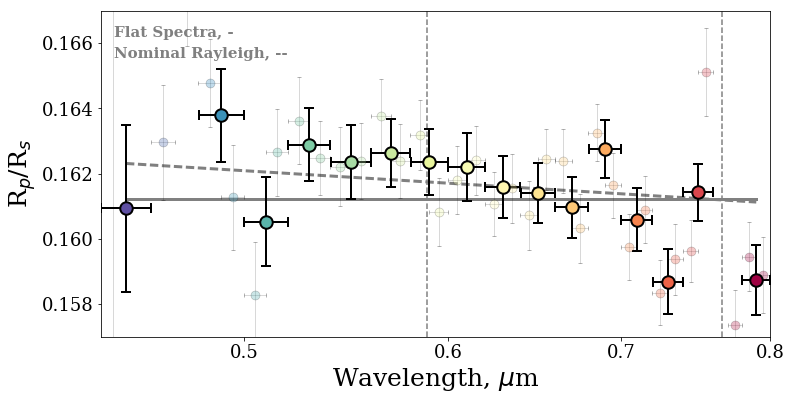

In [15]:
###WASP 4b
width=100
#em=10.

bin_counts=np.load(SAVEPATH+'Binned_Data_'+str(int(width))+'.npz')['bin_counts']  #[n_exp,numbins,n_obj]
ptn_err=np.sqrt(bin_counts)
ppm_tar=1./ptn_err[:,:,0]
ppm_tar_exp=np.nanmedian(ppm_tar,axis=0)

bin_counts_200=np.load(SAVEPATH+'Binned_Data_200.npz')['bin_counts']  #[n_exp,numbins,n_obj]
ptn_err_200=np.sqrt(bin_counts_200)
ppm_tar_200=1./ptn_err_200[:,:,0]
ppm_tar_exp_200=np.nanmedian(ppm_tar_200,axis=0)


bin_ctr_200=np.load(SAVEPATH+'LC_bins_br_200.npz')['bin_ctr']
rp_200=np.empty([len(bin_ctr_200)])
rp_e_200=np.empty([len(bin_ctr_200)])

bin_ctr=np.load(SAVEPATH+'LC_bins_br_'+str(int(width))+'.npz')['bin_ctr']
rp=np.empty([len(bin_ctr)])
rp_e=np.empty([len(bin_ctr)])

##################################################################################
norm=matplotlib.colors.Normalize(vmin=np.min(bin_ctr_200),vmax=np.max(bin_ctr_200))                                                                                                                 
colors=matplotlib.cm.Spectral_r
scal_m=matplotlib.cm.ScalarMappable(cmap=colors,norm=norm)
scal_m.set_array([])
##################################################################################

print len(bin_ctr)

b=0
for file in os.listdir(SAVEPATH+'Fits_'+str(int(width))+'/'):
    if file.endswith('.npz'):
        if b==len(bin_ctr):
            rbwhite=(np.load(SAVEPATH+'Fits_'+str(int(width))+'/'+file)['params'])[2]
        else:
            rp[b]=(np.load(SAVEPATH+'Fits_'+str(int(width))+'/'+file)['params'])[2]
            rp_e[b]=np.nanmedian((np.load(SAVEPATH+'Fits_'+str(int(width))+'/'+file)['paramserr'])[0,0])
#            rs_e[b]=np.abs(np.nanmedian(np.load(SAVEPATH+'Fits_'+str(int(width))+'/'+file)['residuals']))*10**-6
            b+=1
            
b=0
for file in os.listdir(SAVEPATH+'Fits_200/'):
    if file.endswith('.npz'):
        if b==len(bin_ctr_200):
            rbwhite_200=(np.load(SAVEPATH+'Fits_200/'+file)['params'])[2]
        else:
            rp_200[b]=(np.load(SAVEPATH+'Fits_200/'+file)['params'])[2]
            rp_e_200[b]=np.nanmedian((np.load(SAVEPATH+'Fits_200/'+file)['paramserr'])[0,0])
#            rs_e_200[b]=np.abs(np.nanmedian(np.load(SAVEPATH+'Fits_200/'+file)['residuals']))*10**-6
            b+=1
            
owave=np.logspace(4000,9000,1000)

wavelog=np.log(bin_ctr_200)
rays=np.polyfit(wavelog,rp_200,1)
ray=(np.poly1d(rays))(wavelog)

lins=np.polyfit(wavelog,rp_200,0)
lin=(np.poly1d(lins))(wavelog)



###########################
#sys.path.insert(0,SAVEPATH) 
#from SystemCons import *

alpha=-4.
kb=1.380658*10**-16   #boltzmann constant, erg/K
mh=1.6726*10**-24     #mass of hydrogen in g
muj=2.3                #mu of jupiter

# Rs is in cm

#-----W4, int=0.1735
Rs=6.4*10**10.
Tplan=1600.   #temperature of planet in K
gplan=1707.   # gravity in cm/s^2


slope=(alpha/Rs)*(kb*Tplan)/((muj*mh)*gplan)
raya=(np.poly1d([slope,0.18]))(wavelog)
#########################

chi_rayfit=np.nansum((ray-rp_200)**2.)
chi_flat=np.nansum((lin-rp_200)**2.)
chi_act=np.nansum((raya-rp_200)**2.)

xerr1=np.abs(np.log(bin_ctr/(bin_ctr-width/2.)))
xerr2=np.abs(np.log(bin_ctr_200/(bin_ctr_200+100.)))
                
            
            
plt.figure(figsize=(12,6)) 
#plt.figure(figsize=(8,10.5)) #full page size
#plt.figure(figsize=(8,5.25)) #half page size

plt.plot(wavelog,lin,color='grey',linewidth=3.0,linestyle='-')
plt.plot(wavelog,raya,color='grey',linewidth=3.0,linestyle='--')

#plt.plot(np.log(waves_dn_b+(waves_up_b-waves_dn_b)/2.),rads_b+lin[0],'D',markersize=15,markeredgecolor='black',markerfacecolor='purple',zorder=8,alpha=0.7)
#plt.errorbar(np.log(waves_dn_b+(waves_up_b-waves_dn_b)/2.),rads_b+lin[0],yerr=rads_err_b,zerr=(waves_up_b-waves_dn_b),capsize=2,ecolor='grey',fmt='None',zorder=7,alpha=0.7)

#plt.plot(np.log(waves_dn_r+(waves_up_r-waves_dn_r)/2.),rads_r+lin[0],'D',markersize=15,markeredgecolor='black',markerfacecolor='purple',zorder=8,alpha=0.7)
#plt.errorbar(np.log(waves_dn_r+(waves_up_r-waves_dn_r)/2.),rads_r+lin[0],yerr=rads_err_r,zerr=(waves_up_r-waves_dn_r),capsize=2,ecolor='grey',fmt='None',zorder=7,alpha=0.7)

for b in range(0,len(bin_ctr)):
#    if b==0 or b==1 or b==3 or b==5:
#        continue
    plt.plot(np.log(bin_ctr[b]),rp[b],'.', markeredgewidth=0.5,markersize=18,markeredgecolor='black', markerfacecolor=scal_m.to_rgba(bin_ctr[b]),alpha=0.3,zorder=11)
#    #plt.errorbr(np.log(bin_ctr[b]),rp[b],yerr=ppm_tar_exp[b],xerr=xerr1[b],color='black',elinewidth=0.5,capsize=2.0,capthick=1.0,alpha=0.3,zorder=10)
    plt.errorbar(np.log(bin_ctr[b]),rp[b],yerr=rp_e[b],xerr=xerr1[b],color='black',elinewidth=0.5,capsize=2.0,capthick=1.0,alpha=0.3,zorder=10)

    #em*(rp_e_200[b]+rs_e_200[b]+dt_e_t_200[b])
for b in range(0,len(bin_ctr_200)):
    if b==1:
        continue
    #if b==0 or b==1 or b==2:# or b==3 or b==11 or b==17:
    #    continue
    plt.plot(np.log(bin_ctr_200[b]),rp_200[b],'.', markeredgewidth=2.0,markersize=25,markeredgecolor='black', markerfacecolor=scal_m.to_rgba(bin_ctr_200[b]),zorder=11)
    plt.errorbar(np.log(bin_ctr_200[b]),rp_200[b],yerr=rp_e_200[b],xerr=xerr2[b],color='black',elinewidth=2.0,capsize=5.0,capthick=2.0,zorder=10)
plt.axvline(x=np.log(5890),linestyle='--',color='grey')
plt.axvline(x=np.log(7665),linestyle='--',color='grey')

plt.xticks(np.log([4000,5000,6000,7000,8000,9000]),['0.4','0.5','0.6','0.7','0.8','0.9'],fontsize=18,fontproperties=font)
plt.xlim(np.log(4400),np.log(8000))

plt.ylim(0.157,0.167)

plt.yticks(fontsize=18,fontproperties=font)
plt.ylabel('R$_p$/R$_s$',fontsize=25,fontproperties=font)

#plt.figtext(0.15,0.27,'Rayleigh Fit, -',color='grey',fontsize=15,fontproperties=fontb)
plt.figtext(0.14,0.82,'Flat Spectra, -', color='grey',fontsize=15,fontproperties=fontb)
plt.figtext(0.14,0.77,'Nominal Rayleigh, --', color='grey',fontsize=15,fontproperties=fontb)


plt.xlabel('Wavelength, $\mu$m',fontsize=25,fontproperties=font)
#plt.show()
plt.savefig(SAVEPATH+'PLOTS/TSpec_alldata'+str(int(width))+'.pdf')        

In [13]:
print chi_rayfit
print chi_flat/np.nanmedian(rp_e_200)
print chi_act/np.nanmedian(rp_e_200)

8.68330976409e-05
0.132835196263
2.62319635335


18
[ 4400.  4600.  4800.  5000.  5200.  5400.  5600.  5800.  6000.  6200.
  6400.  6600.  6800.  7000.  7200.  7400.  7600.  7800.  8000.  8200.
  8400.]


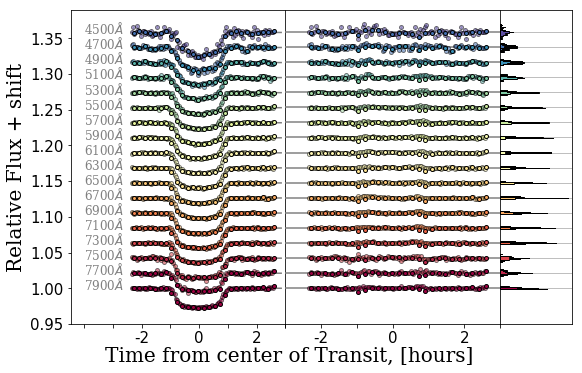

In [32]:
width=200
##############

from matplotlib.font_manager import FontProperties
font0=FontProperties()
font=font0.copy()
font.set_family('serif')

fontb=font.copy()
fontb.set_weight('bold')

import matplotlib.gridspec as gridspec

import os
###############

lc_data_binns=np.load(SAVEPATH+'LC_bins_br_'+str(int(width))+'.npz')['data']
lc_data_white=np.load(SAVEPATH+'LCwhite_br.npz')['data']


t_z=np.load(SAVEPATH+'LCwhite_br.npz')['avt']
            
#lc_data_white_z=np.load(SAVEPATH+'LCwhite_br_Corr.npz')['avf']
lc_data_binns_z=np.load(SAVEPATH+'LC_bins_br_'+str(int(width))+'.npz')['avf']


bin_arr=np.load(SAVEPATH+'Binned_Data_'+str(int(width))+'.npz')['bins']
bin_ctr=np.load(SAVEPATH+'LC_bins_br_'+str(int(width))+'.npz')['bin_ctr']
n_bins=len(bin_ctr)

print n_bins

bin_arr=np.append(bin_arr,[bin_arr[-1]+width,bin_arr[-1]+2*width])
print bin_arr

###############
norm=matplotlib.colors.Normalize(vmin=np.min(bin_ctr),vmax=np.max(bin_ctr))                                                                                                                 
colors=matplotlib.cm.Spectral_r
scal_m=matplotlib.cm.ScalarMappable(cmap=colors,norm=norm)
scal_m.set_array([])
################

t=np.load(SAVEPATH+'Obs_times.npz')['times']
n_exp=len(t)


lc_fit=np.empty([n_exp,n_bins])
lc_fit_z=np.empty([len(t_z),n_bins])
lc_data=np.empty([n_exp,n_bins])
#lc_data_z=np.empty([len(t_z),n_bins])





###############

b=0
for file in os.listdir(SAVEPATH+'Fits_'+str(int(width))+'/'):
    if file.endswith('.npz'):
        if b==len(bin_ctr):
            lcwhite=(np.load(SAVEPATH+'Fits_'+str(int(width))+'/'+file)['lightcurve_fit'])
            t0=-1.0*(np.load(SAVEPATH+'Fits_'+str(int(width))+'/'+file)['params'])[0]
        else:
            lc_fit[:,b]=(np.load(SAVEPATH+'Fits_'+str(int(width))+'/'+file)['lightcurve_fit'])
            lc_fit_z[:,b]=(np.load(SAVEPATH+'Fits_'+str(int(width))+'/'+file)['lcfitz'])
            b+=1

#lcwhite=np.load(SAVEPATH+'Fits_'+str(int(width))+'/LightCurve_fits_spot.npz')['lightcurve_fit']
lcwhite=np.load(SAVEPATH+'Fits_'+str(int(width))+'/LightCurve_fits_white.npz')['lightcurve_fit']
            
white_res=lcwhite-lc_data_white
for b in range(0,n_bins):
    lc_data_binns[:,b]+=white_res
            
#plt.figure(figsize=(8.5,11))
#plt.figure(figsize=(10,7.5))
#plt.figure(figsize=(8,10.5)) #full page size
#plt.figure(figsize=(8,7.875))
plt.figure(figsize=(8,5.25)) #half page size
#plt.figure(figsize=(8,3.5)) #third page size

plt.gcf().subplots_adjust(bottom=0.12,top=0.95,left=0.12,right=0.99)
gs1=gridspec.GridSpec(1,7)
gs1.update(wspace=0.00,hspace=0.0)


ymin=0.95
ymax=1.01

shift=np.linspace(0,n_bins/35., n_bins+1)
shift=0
dv=45.
p0=plt.subplot(gs1[:,:3])
for b in range(n_bins-1,-1,-1):
#    if b==0 or b==1 or b==2:
#        continue
    p0=plt.plot(24*(t+t0),lc_fit[:,b]+shift,'-',linewidth=1.5,color='grey',zorder=10)
    p0=plt.plot(24*(t+t0),lc_data_binns[:,b]+shift,'.',markeredgewidth=1.0,markersize=8,markeredgecolor='black', markerfacecolor=scal_m.to_rgba(bin_ctr[b]),zorder=11,alpha=0.5)
    #p0=plt.annotate(str(int(bin_ctr[b]))+'$\AA$',xy=(-3.8,1.0+shift-0.002),ha='left',fontproperties=font,color='grey',fontsize=12)
    p0=plt.annotate(str(int(bin_ctr[b]))+'$\AA$',xy=(-4.0,1.0+shift-0.002),ha='left',fontproperties=font,color='grey',fontsize=12)

    p0=plt.plot(24*(t_z+t0),lc_data_binns_z[:,b]+shift,'.',markeredgewidth=1.0,markersize=8,markeredgecolor='black', markerfacecolor=scal_m.to_rgba(bin_ctr[b]+width),zorder=12)
    p0=plt.errorbar(24*(t+t0),lc_data_binns[:,b]+shift,yerr=ppm_tar_exp[b],ecolor=scal_m.to_rgba(bin_ctr[b]),elinewidth=0.5,alpha=0.7,fmt=None,zorder=11)
    shift+=(n_bins/dv)/(n_bins+1.)
p0=plt.xlim((t[0]-0.08)*24,(t[-1]+0.01)*24)
p0=plt.ylim(ymin,ymax+shift)
p0=plt.ylabel('Relative Flux + shift',fontsize=20,fontproperties=font)
p0=plt.yticks(fontsize=15)
#p0=plt.xticks([-6,-5,-4,-3,-2,-1,0,1,2,3,4],['','','-4','', '-2','','0','','2','','4'],fontsize=15)
#p0=plt.xticks([-4,-3,-2,-1,0,1,2,3,4],['-4','', '-2','','0','','2','','4'],fontsize=15)
#p0=plt.xticks([-4,-3,-2,-1,0,1,2,3,4],['-4','','-2','','0','','2','','4'],fontsize=15)
p0=plt.xticks([-4,-3,-2,-1,0,1,2,3],['','','-2','','0','','2',''],fontsize=15)
    
residuals=lc_data_binns-lc_fit
residuals_z=lc_data_binns_z-lc_fit_z

shift=0
p1=plt.subplot(gs1[:,3:6])
for b in range(n_bins-1,-1,-1):
#    if b==0 or b==1 or b==2:
#        continue
    p1=plt.axhline(y=np.nanmean((residuals[:,b])+shift),color='grey',linewidth=1.5,zorder=10)
    p1=plt.plot(24*(t+t0),(residuals[:,b])+shift,'.',markeredgewidth=1.0,markersize=8,markeredgecolor='black', markerfacecolor=scal_m.to_rgba(bin_ctr[b]),zorder=11,alpha=0.5)
    
    p1=plt.plot(24*(t_z+t0),(residuals_z[:,b])+shift,'.',markeredgewidth=1.0,markersize=8,markeredgecolor='black', markerfacecolor=scal_m.to_rgba(bin_ctr[b]+width),zorder=12)
    p1=plt.errorbar(24*(t+t0),(residuals[:,b])+shift,yerr=ppm_tar_exp[b],ecolor=scal_m.to_rgba(bin_ctr[b]),elinewidth=0.5,alpha=0.7,fmt=None,zorder=11)
    shift+=(n_bins/dv)/(n_bins+1.)
p1=plt.yticks([],[])
#p1=plt.xticks([-6,-5,-4,-3,-2,-1,0,1,2,3,4],['','','-4','', '-2','','0','','2','','4'],fontsize=15)
#p1=plt.xticks([-3,-2,-1,0,1,2,3,4],['','-2','','0','','2','','4'],fontsize=15)
p1=plt.xticks([-3,-2,-1,0,1,2,3],['','-2','','0','','2',''],fontsize=15)

p1=plt.ylim(ymin-1.0,ymax-1.0+shift)

p2=plt.subplot(gs1[:,6])
shift=0
for b in range(n_bins-1,-1,-1):
#    if b==0 or b==1 or b==2:
#        continue
    finite=residuals[np.isfinite(residuals[:,b]),b]
    p2=plt.axhline(y=np.nanmean((residuals[:,b])+shift),color='grey',linewidth=0.5,zorder=10)
    p2=plt.hist((finite[:]+shift),bins=31,orientation='horizontal',histtype='stepfilled',edgecolor='black',facecolor=scal_m.to_rgba(bin_ctr[b]),normed=True,zorder=11)
    shift+=(n_bins/dv)/(n_bins+1.)
p2=plt.ylim(ymin-1.0,ymax-1.0+shift)
p2=plt.yticks([],[])
p2=plt.xticks([],[])
#plt.ylim(0.98,1.01+shift[-1])

#plt.figtext(0.12,0.14,'ut20160811',fontsize=15,fontproperties=fontb,color='black')

plt.figtext(0.5,0.02,'Time from center of Transit, [hours]', fontsize=20, ha='center',fontproperties=font)

plt.savefig(SAVEPATH+'PLOTS/all_lcs_err_'+str(int(width))+'_new.pdf')    

In [28]:
#5=c1 6=c2
bin_ctr_200=np.load(SAVEPATH+'LC_bins_br_200.npz')['bin_ctr']

nbins=len(bin_ctr_200)


fit_c1=np.empty([nbins])*0.0
fit_c2=np.empty([nbins])*0.0

c1_err=np.empty([nbins])*0.0
c2_err=np.empty([nbins])*0.0

import os

b=0
for file in os.listdir(SAVEPATH+'Fits_200/'):
    if file.endswith('.npz'):
        if b==len(bin_ctr_200):
            print b, file
#            c1_white=(np.load(SAVEPATH+'Fits_200/'+file)['params'])[5]
#            c2_white=(np.load(SAVEPATH+'Fits_200/'+file)['params'])[6]
        else:
            fit_c1[b]=(np.load(SAVEPATH+'Fits_200/'+file)['params'])[5]
            fit_c2[b]=(np.load(SAVEPATH+'Fits_200/'+file)['params'])[6]
            c1_err[b]=np.nanmedian((np.load(SAVEPATH+'Fits_200/'+file)['paramserr'])[1])
            c2_err[b]=np.nanmedian((np.load(SAVEPATH+'Fits_200/'+file)['paramserr'])[2])
            b+=1
            
print fit_c1
print fit_c2

print c1_err
print c2_err

print bin_ctr_200

18 LightCurve_fits_white.npz
[ 0.71765317  0.59695089  0.54467587  0.52766742  0.44634417  0.40554764
  0.38762424  0.35601544  0.33810154  0.31578717  0.29690202  0.28672136
  0.2710148   0.25933263  0.24771062  0.22676253  0.26728783  0.22063362]
[ 0.11139297  0.05949786  0.07072532  0.10509735  0.10692157  0.12774862
  0.13412688  0.13635708  0.14082739  0.14606384  0.15168852  0.15550785
  0.15468119  0.15515906  0.15629491  0.1538995   0.17294896  0.16084244]
[ 0.05649458  0.03610773  0.03338056  0.03531879  0.02421831  0.02304376
  0.02311447  0.01669295  0.01846796  0.0151379   0.01516975  0.01807644
  0.0163945   0.0165693   0.01619995  0.01009256  0.03653457  0.02196446]
[ 0.05731705  0.02782296  0.01944221  0.0277211   0.0128646   0.0122195
  0.01168084  0.00869204  0.00762245  0.00675803  0.00685365  0.00826949
  0.00707407  0.00716156  0.00785008  0.00463779  0.02379616  0.01161267]
[ 4500.  4700.  4900.  5100.  5300.  5500.  5700.  5900.  6100.  6300.
  6500.  6700.  6900.

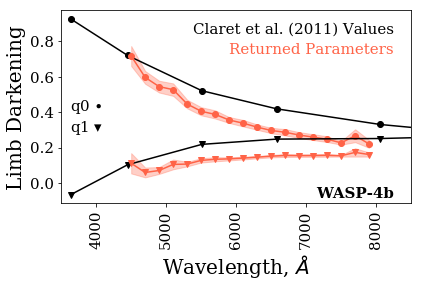

In [30]:
ft_c='tomato'

#_ac is CLARET TABLES
#_ft is FIT VALUES

c1_ft=fit_c1
c2_ft=fit_c2

c1_ac=np.array([0.9264,0.7208,0.5216,0.4191,0.3307,0.1767])  #WASP4
c2_ac=np.array([-0.0652,0.1033,0.2184,0.2481,0.2514,0.2922]) #WASP4
#c1_ac=np.array([1.0666,0.8661,0.6538,0.5240,0.4100,0.2315])
#c2_ac=np.array([-0.2171,-0.0193,0.1211,0.1803,0.2043,0.2752])
wave=[3640,4450,5510,6580,8060,12200]

bins=bin_ctr_200

from matplotlib.font_manager import FontProperties
font0=FontProperties()
font=font0.copy()
font.set_family('serif')

fontb=font.copy()
fontb.set_weight('bold')

plt.gcf().subplots_adjust(bottom=0.28,top=0.95,left=0.18,right=0.99)

plt.plot(wave,c1_ac,color='black')
plt.plot(bins,c1_ft,color=ft_c)
plt.plot(wave,c1_ac,'o',color='black')
plt.plot(bins,c1_ft,'o',color=ft_c)

plt.plot(wave,c2_ac,color='black')
plt.plot(bins,c2_ft,color=ft_c)
plt.plot(wave,c2_ac,'v',color='black')
plt.plot(bins,c2_ft,'v',color=ft_c)

plt.fill_between(bins,c1_ft-c1_err,c1_ft+c1_err,color=ft_c,alpha=0.3)
plt.fill_between(bins,c2_ft-c2_err,c2_ft+c2_err,color=ft_c,alpha=0.3)


plt.figtext(0.95,0.87,'Claret et al. (2011) Values',color='black',fontsize=15,ha='right',fontproperties=font)
plt.figtext(0.95,0.80,'Returned Parameters',color=ft_c,fontsize=15,ha='right',fontproperties=font)
plt.figtext(0.2,0.6,'q0 $\\bullet$',color='black',fontsize=15,fontproperties=font)
plt.figtext(0.2,0.53,'q1 $\\blacktriangledown$',color='black',fontsize=15,fontproperties=font)

plt.figtext(0.95,0.3,'WASP-4b',color='black',ha='right',fontsize=15,fontproperties=fontb)

plt.xticks(fontproperties=font,fontsize=15,rotation='vertical')
plt.yticks(fontproperties=font,fontsize=15)

plt.xlabel('Wavelength, $\AA$',fontproperties=font,fontsize=20)
plt.ylabel('Limb Darkening',fontproperties=font,fontsize=20)

plt.xlim(3500,8500)

plt.savefig(SAVEPATH+'PLOTS/Claret_vs_fit_limbdark.pdf')
plt.show()

2113 2275
0.984931784747 0.976829720636


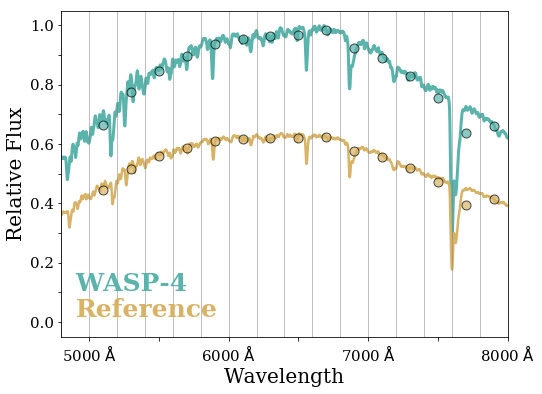

In [30]:
corr=False
width_bin=200

import scipy.signal

from matplotlib.font_manager import FontProperties
font0=FontProperties()
font=font0.copy()
font.set_family('serif')

fontb=font.copy()
fontb.set_weight('bold')

if corr==True:
    cnt_arr=np.load(SAVEPATH+'ShiftedSpec_All_Corr.npz')['convolved']
    #cnt_arr=np.load(SAVEPATH+'ShiftedSpec_All_Corr.npz')['data']
    wav_arr=np.load(SAVEPATH+'ShiftedSpec_All_Corr.npz')['wave']
    ptn_err=np.load(SAVEPATH+'FlattenedSpectra_Corr.npz')['pht_err']
#    tot_err=np.load(SAVEPATH+'FlattenedSpectra_Corr.npz')['tot_err']
    binns=np.load(SAVEPATH+'Binned_Data_'+str(int(width_bin))+'_Corr.npz')['bin_counts']
    bin_a=np.load(SAVEPATH+'Binned_Data_'+str(int(width_bin))+'_Corr.npz')['bins']
    bin_c=np.load(SAVEPATH+'Binned_Data_'+str(int(width_bin))+'_Corr.npz')['bin_centers']
else:
    cnt_arr=np.load(SAVEPATH+'ShiftedSpec_All.npz')['convolved']
    #cnt_arr=np.load(SAVEPATH+'ShiftedSpec_All.npz')['data']
    wav_arr=np.load(SAVEPATH+'ShiftedSpec_All.npz')['wave']
    ptn_err=np.load(SAVEPATH+'FlattenedSpectra.npz')['pht_err']
#    tot_err=np.load(SAVEPATH+'FlattenedSpectra.npz')['tot_err']
    binns=np.load(SAVEPATH+'Binned_Data_'+str(int(width_bin))+'.npz')['bin_counts']
    bin_a=np.load(SAVEPATH+'Binned_Data_'+str(int(width_bin))+'.npz')['bins']
    bin_c=np.load(SAVEPATH+'Binned_Data_'+str(int(width_bin))+'.npz')['bin_centers']

cnt_arr=np.flip(cnt_arr,axis=2)
wav_arr=np.flip(wav_arr,axis=2)

#Wasp52
#-------
#Cals_ind=[2]
#Cals_ind=[2,3,5,8]  
#csn=2

#Wasp4
#------
#1,4,5,7,8,10,11,12
#USE: 5,
Cals_ind=[5]

#HatP26b
#-----
#1,2,3,4,5,6,7
# X 1
#------
#Cals_ind=[2,3,4,5,6]
#csn=2

#Cals=np.zeros_like(cnt_arr[0,0,:])
#errs_cw_t=np.zeros_like(cnt_arr[0,0,:])
#errs_cw_p=np.zeros_like(cnt_arr[0,0,:])
#for c in Cals_ind:
#    Cals=(np.nansum([Cals,cnt_arr[c,0,:]],axis=0))
#    errs_cw_t=np.sqrt(np.nansum([errs_cw_t,tot_err[c,0,:]**2.],axis=0))
#    errs_cw_p=np.sqrt(np.nansum([errs_cw_p,ptn_err[c,0,:]**2.],axis=0))

plt.figure(figsize=(8,6))

t=10
tar=scipy.signal.medfilt(cnt_arr[0,t,:]/np.nanmax(cnt_arr[0,t,:]),kernel_size=1)

#r1=1865
#r2=1878
#tar[r1:r2+1]=np.nan

tarc='#5ab4ac'
calc='#d8b365'

bot=np.argmin(np.abs(wav_arr[0,t,:]-6600))
top=np.argmin(np.abs(wav_arr[0,t,:]-6800))
print bot, top

med_bin0=np.nanmean(cnt_arr[0,t,bot:top]/np.nanmax(cnt_arr[0,t,:]))
med_binc=np.nanmean(cnt_arr[c,t,bot:top]/np.nanmax(cnt_arr[c,t,:]))
print med_bin0, med_binc

#for t in range(0,wav_arr.shape[1]):
plt.plot(wav_arr[0,t,:],tar,linewidth=3.0,color=tarc)
#for p in range(0,len(wav_arr[0,t,:])):
#    plt.annotate(p,xy=(wav_arr[0,t,p],tar[p]))
for c in Cals_ind:
    plt.plot(wav_arr[c,t,:],cnt_arr[c,t,:]/np.nanmax(cnt_arr[0,t,:]),linewidth=2.5,color=calc)

#plt.axvline(x=7593.7,color='grey',linewidth=0.5,linestyle='--')
#plt.axvline(x=6867.19,color='grey',linewidth=0.5,linestyle='--')
#plt.axvline(x=6562.81,color='grey',linewidth=0.5,linestyle='--')
#plt.axvline(x=5895.9,color='grey',linewidth=0.5,linestyle='--')
#plt.axvline(x=5889.9,color='grey',linewidth=0.5,linestyle='--')

for b in range(0,len(bin_a)):
    plt.axvline(x=bin_a[b],color='grey',linewidth=0.5)

for b in range(0,len(bin_c)):
    if b==1 or b==2:
        continue
    bot0=np.argmin(np.abs(wav_arr[0,t,:]-bin_a[b]))
    top0=np.argmin(np.abs(wav_arr[0,t,:]-(bin_a[b]+200)))
                   
    med_bin0=np.nanmean(cnt_arr[0,t,bot0:top0]/np.nanmax(cnt_arr[0,t,:]))
    
    plt.plot(bin_c[b],med_bin0,'.',markersize=18,markeredgecolor='black',markerfacecolor=tarc,alpha=0.7)
    for c in Cals_ind:
        botc=np.argmin(np.abs(wav_arr[c,t,:]-bin_a[b]))
        topc=np.argmin(np.abs(wav_arr[c,t,:]-(bin_a[b]+200)))
        med_binc=np.nanmean(cnt_arr[c,t,botc:topc]/np.nanmax(cnt_arr[0,t,:]))
                       
        plt.plot(bin_c[b],med_binc,'.',markersize=18,markeredgecolor='black',markerfacecolor=calc,alpha=0.7)

plt.xticks([5000,5500,6000,6500,7000,7500,8000],['5000 $\mathrm{\AA}$','','6000 $\mathrm{\AA}$','','7000 $\mathrm{\AA}$','','8000 $\mathrm{\AA}$'],fontsize=15,fontproperties=font)
plt.xlabel('Wavelength',fontsize=20,fontproperties=font)

plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],['0.0','','0.2','','0.4','','0.6','','0.8','','1.0'],fontsize=15,fontproperties=font)
plt.ylabel('Relative Flux',fontsize=20,fontproperties=font)

plt.figtext(0.15,0.23,'WASP-4',fontsize=25,fontproperties=fontb,color=tarc)
plt.figtext(0.15,0.17,'Reference',fontsize=25,fontproperties=fontb,color=calc)

#plt.figtext(0.15,0.8,'ut20160922',fontsize=15,fontproperties=fontb,color='black')

plt.xlim(4800,8000)

plt.savefig(SAVEPATH+'PLOTS/Spectra_'+str(int(width_bin))+'.pdf')

In [31]:
for b in range(0,len(bin_ctr_200)):
    print bin_ctr_200[b], np.round(rp_200[b],4), np.round(rp_e_200[b],5)

print '********'
for b in range(0,len(bin_ctr_200)):
    print bin_ctr_200[b],np.round(fit_c1[b],3),np.round(c1_err[b],4),'     ', np.round(fit_c2[b],3), np.round(c2_err[b],4)

4500.0 0.1609 0.00256
4700.0 0.1662 0.00164
4900.0 0.1638 0.00143
5100.0 0.1605 0.00136
5300.0 0.1629 0.00113
5500.0 0.1624 0.00113
5700.0 0.1626 0.00104
5900.0 0.1623 0.00101
6100.0 0.1622 0.00104
6300.0 0.1616 0.00095
6500.0 0.1614 0.00092
6700.0 0.161 0.00094
6900.0 0.1627 0.00089
7100.0 0.1606 0.00096
7300.0 0.1587 0.001
7500.0 0.1614 0.00088
7700.0 0.1521 0.00156
7900.0 0.1587 0.00106
********
4500.0 0.718 0.0565       0.111 0.0573
4700.0 0.597 0.0361       0.059 0.0278
4900.0 0.545 0.0334       0.071 0.0194
5100.0 0.528 0.0353       0.105 0.0277
5300.0 0.446 0.0242       0.107 0.0129
5500.0 0.406 0.023       0.128 0.0122
5700.0 0.388 0.0231       0.134 0.0117
5900.0 0.356 0.0167       0.136 0.0087
6100.0 0.338 0.0185       0.141 0.0076
6300.0 0.316 0.0151       0.146 0.0068
6500.0 0.297 0.0152       0.152 0.0069
6700.0 0.287 0.0181       0.156 0.0083
6900.0 0.271 0.0164       0.155 0.0071
7100.0 0.259 0.0166       0.155 0.0072
7300.0 0.248 0.0162       0.156 0.0079
7500.0 0.227 0